<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;">
    
Tento kód predstavuje praktickú časť bakalárskej práce v oblasti umelej inteligencie, nazývanej 

**"Porovnanie rôznych metód vysvetliteľnosti modelov umelej inteligencie na zvolenej množine dát"**

**Hlavným cieľom** tejto práce je zvýšiť dôveru ľudí voči systémom umelej inteligencie pomocou metód Explainable AI (XAI). 

Bol vyvinutý model umelej inteligencie, založený na dátach HELOC od spoločnosti FICO, a jeho výsledky boli analyzované pomocou metód XAI, aby sa zabezpečilo pochopenie a vysvetlenie rozhodnutí prijatých modelom.

**V tomto súbore uvádzame analýzu údajov získaných z prieskumu, ktorý sme uskutočnili v rámci praktickej časti práce s cieľom určiť najlepšiu metódu XAI pre túto úlohu.**</div>

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;">
<h3>Krok 1  | Prehľad datasetu</h3>
</div>

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/survey_results.csv')

In [4]:
df.head()

,Отметка времени,Всего баллов,Mám skúsenosti s metódami vysvetliteľnosti modelov umelej inteligencie (XAI):,Mám skúsenosti s metódami vysvetliteľnosti modelov umelej inteligencie (XAI): [Количество баллов],Mám skúsenosti s metódami vysvetliteľnosti modelov umelej inteligencie (XAI): [Отзыв],Moje odborné zameranie:,Moje odborné zameranie: [Количество баллов],Moje odborné zameranie: [Отзыв],"Z vysvetlenia som pochopila/pochopil, ako sa systém rozhoduje.","Z vysvetlenia som pochopila/pochopil, ako sa systém rozhoduje. [Количество баллов]",...,Vysvetlenie zvyšuje moju dôveru voči systému. [Отзыв].4,"Vysvetlenie obsahuje dostatok informácií na pochopenie toho, ako sa systém rozhoduje..3","Vysvetlenie obsahuje dostatok informácií na pochopenie toho, ako sa systém rozhoduje. [Количество баллов].3","Vysvetlenie obsahuje dostatok informácií na pochopenie toho, ako sa systém rozhoduje. [Отзыв].3","Na základe vyššie uvedeného vysvetlenia č. 5 budem môcť Johnovi vysvetliť, či bola jeho žiadosť prijatá/neprijatá a prečo.","Na základe vyššie uvedeného vysvetlenia č. 5 budem môcť Johnovi vysvetliť, či bola jeho žiadosť prijatá/neprijatá a prečo. [Количество баллов]","Na základe vyššie uvedeného vysvetlenia č. 5 budem môcť Johnovi vysvetliť, či bola jeho žiadosť prijatá/neprijatá a prečo. [Отзыв]",Najvhodnejším vysvetlením (najvhodnejšou metódou) pre túto úlohu podľa mňa je:,Najvhodnejším vysvetlením (najvhodnejšou metódou) pre túto úlohu podľa mňa je: [Количество баллов],Najvhodnejším vysvetlením (najvhodnejšou metódou) pre túto úlohu podľa mňa je: [Отзыв]
0,2024/04/15 4:37:57 PM GMT+2,0.00 / 0,Áno,-- / 0,NaN,Umelá inteligencia,-- / 0,NaN,4,-- / 0,...,NaN,4,-- / 0,NaN,4,-- / 0,NaN,Vysvetlenie č. 5,-- / 0,NaN
1,2024/04/15 5:08:59 PM GMT+2,0.00 / 0,Nie,-- / 0,NaN,Umelá inteligencia,-- / 0,NaN,5,-- / 0,...,NaN,3,-- / 0,NaN,3,-- / 0,NaN,Vysvetlenie č. 1,-- / 0,NaN
2,2024/04/15 6:20:15 PM GMT+2,0.00 / 0,Nie,-- / 0,NaN,Hospodárska informatika,-- / 0,NaN,5,-- / 0,...,NaN,5,-- / 0,NaN,5,-- / 0,NaN,Vysvetlenie č. 5,-- / 0,NaN
3,2024/04/15 7:11:33 PM GMT+2,0.00 / 0,Nie,-- / 0,NaN,Počítačové siete,-- / 0,NaN,4,-- / 0,...,NaN,5,-- / 0,NaN,5,-- / 0,NaN,Vysvetlenie č. 1,-- / 0,NaN
4,2024/04/15 7:14:56 PM GMT+2,0.00 / 0,Áno,-- / 0,NaN,Umelá inteligencia,-- / 0,NaN,5,-- / 0,...,NaN,4,-- / 0,NaN,5,-- / 0,NaN,Vysvetlenie č. 4,-- / 0,NaN


In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 86 columns):
 #   Column                                                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                                                          --------------  -----  
 0   Отметка времени                                                                                                                                 19 non-null     object 
 1   Всего баллов                                                                                                                                    19 non-null     object 
 2   Mám skúsenosti s metódami  vysvetliteľnosti modelov umelej inteligencie (XAI):                                                                  19 non-null     object 
 3   Mám skúsenosti s metódami  

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;">
<h3>Krok 2  | Vymazanie stĺpcov</h3>
Vymazanie stĺpcov, ktoré obsahujú hodnoty -- / 0 a NaN, ako aj stĺpcov Časová značka (Отметка времени) a Celkový počet bodov (Всего баллов).
</div>

In [10]:
df_copy = df.copy()
columns_to_drop = [i for i in range(0, len(df.columns), 3)] + [i+1 for i in range(0, len(df.columns), 3)]
df_copy.drop(df.columns[columns_to_drop], axis=1, inplace=True)
df_copy.head()

,Mám skúsenosti s metódami vysvetliteľnosti modelov umelej inteligencie (XAI):,Moje odborné zameranie:,"Z vysvetlenia som pochopila/pochopil, ako sa systém rozhoduje.",Toto vysvetlenie fungovania systému je jednoduché na pochopenie.,Vysvetlenie zvyšuje moju dôveru voči systému.,"Vysvetlenie obsahuje dostatok informácií na pochopenie toho, ako sa systém rozhoduje.\n","Na základe vyššie uvedeného vysvetlenia č. 1 budem môcť Johnovi vysvetliť, či bola jeho žiadosť prijatá/neprijatá a prečo.","Z vysvetlenia som pochopila/pochopil, ako sa systém rozhoduje..1",Toto vysvetlenie fungovania systému je jednoduché na pochopenie..1,Vysvetlenie zvyšuje moju dôveru voči systému..1,...,Toto vysvetlenie fungovania systému je jednoduché na pochopenie..3,Vysvetlenie zvyšuje moju dôveru voči systému..3,"Vysvetlenie obsahuje dostatok informácií na pochopenie toho, ako sa systém rozhoduje..2","Na základe vyššie uvedeného vysvetlenia č. 4 budem môcť Johnovi vysvetliť, či bola jeho žiadosť prijatá/neprijatá a prečo.","Z vysvetlenia som pochopila/pochopil, ako sa systém rozhoduje..4",Toto vysvetlenie fungovania systému je jednoduché na pochopenie..4,Vysvetlenie zvyšuje moju dôveru voči systému..4,"Vysvetlenie obsahuje dostatok informácií na pochopenie toho, ako sa systém rozhoduje..3","Na základe vyššie uvedeného vysvetlenia č. 5 budem môcť Johnovi vysvetliť, či bola jeho žiadosť prijatá/neprijatá a prečo.",Najvhodnejším vysvetlením (najvhodnejšou metódou) pre túto úlohu podľa mňa je:
0,Áno,Umelá inteligencia,4,4,5,4,4,3,3,4,...,3,5,4,4,4,3,5,4,4,Vysvetlenie č. 5
1,Nie,Umelá inteligencia,5,4,5,5,4,3,4,4,...,2,3,2,3,2,3,3,3,3,Vysvetlenie č. 1
2,Nie,Hospodárska informatika,5,4,5,5,4,5,4,4,...,4,4,4,4,5,5,5,5,5,Vysvetlenie č. 5
3,Nie,Počítačové siete,4,3,4,3,4,4,3,4,...,4,4,5,4,5,5,5,5,5,Vysvetlenie č. 1
4,Áno,Umelá inteligencia,5,4,5,4,5,5,5,5,...,5,5,5,5,5,5,5,4,5,Vysvetlenie č. 4


In [11]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 28 columns):
 #   Column                                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                                      --------------  ----- 
 0   Mám skúsenosti s metódami  vysvetliteľnosti modelov umelej inteligencie (XAI):                                              19 non-null     object
 1   Moje odborné zameranie:                                                                                                     19 non-null     object
 2   Z vysvetlenia som pochopila/pochopil, ako sa systém rozhoduje.                                                              19 non-null     int64 
 3   Toto vysvetlenie fungovania systému je jednoduché na pochopenie.                                                            19 non-n

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;">
<h3>Krok 3 | Premenovanie stĺpcov</h3>
</div>

In [12]:
df_copy.columns = ['XAI_Experience', 'Major', 
              'LIME_Understandable', 'LIME_Easy', 'LIME_Trust', 'LIME_Sufficient', 'LIME_Explain',
              'SHAP_Understandable', 'SHAP_Easy', 'SHAP_Trust', 'SHAP_Sufficient', 'SHAP_Explain',
              'Anchors_Understandable', 'Anchors_Easy', 'Anchors_Trust', 'Anchors_Sufficient', 'Anchors_Explain',
              'PDP_Understandable', 'PDP_Easy', 'PDP_Trust', 'PDP_Sufficient', 'PDP_Explain',
              'ALE_Understandable', 'ALE_Easy', 'ALE_Trust', 'ALE_Sufficient', 'ALE_Explain',
              'Best_Method'
             ]

In [13]:
df_copy

,XAI_Experience,Major,LIME_Understandable,LIME_Easy,LIME_Trust,LIME_Sufficient,LIME_Explain,SHAP_Understandable,SHAP_Easy,SHAP_Trust,...,PDP_Easy,PDP_Trust,PDP_Sufficient,PDP_Explain,ALE_Understandable,ALE_Easy,ALE_Trust,ALE_Sufficient,ALE_Explain,Best_Method
0,Áno,Umelá inteligencia,4,4,5,4,4,3,3,4,...,3,5,4,4,4,3,5,4,4,Vysvetlenie č. 5
1,Nie,Umelá inteligencia,5,4,5,5,4,3,4,4,...,2,3,2,3,2,3,3,3,3,Vysvetlenie č. 1
2,Nie,Hospodárska informatika,5,4,5,5,4,5,4,4,...,4,4,4,4,5,5,5,5,5,Vysvetlenie č. 5
3,Nie,Počítačové siete,4,3,4,3,4,4,3,4,...,4,4,5,4,5,5,5,5,5,Vysvetlenie č. 1
4,Áno,Umelá inteligencia,5,4,5,4,5,5,5,5,...,5,5,5,5,5,5,5,4,5,Vysvetlenie č. 4
5,Nie,Biznis/Ekonomika,4,4,5,4,4,4,4,4,...,5,5,5,5,5,5,5,5,5,Vysvetlenie č. 2
6,Áno,Počítačové siete,4,4,4,3,3,4,4,4,...,5,4,5,4,3,4,5,4,5,Vysvetlenie č. 3
7,Nie,Umelá inteligencia,2,1,1,1,1,5,5,5,...,3,3,3,3,3,3,3,3,3,Vysvetlenie č. 2
8,Áno,Dátová analytika,5,5,5,4,5,4,4,4,...,5,5,5,5,5,5,5,5,5,Vysvetlenie č. 1
9,Nie,Elektrotechnika,3,4,3,4,4,5,3,4,...,3,4,3,4,3,3,4,3,4,Vysvetlenie č. 1


In [14]:
df_copy['Major'] = df_copy['Major'].replace('Hospodárska informatika', 'Biznis/Ekonomika')

In [15]:
replace_dict = {
    'Vysvetlenie č. 1': 'LIME',
    'Vysvetlenie č. 2': 'SHAP',
    'Vysvetlenie č. 3': 'Anchors',
    'Vysvetlenie č. 4': 'PDP',
    'Vysvetlenie č. 5': 'ALE'
}

df_copy['Best_Method'] = df_copy['Best_Method'].replace(replace_dict)


In [16]:
df_copy

,XAI_Experience,Major,LIME_Understandable,LIME_Easy,LIME_Trust,LIME_Sufficient,LIME_Explain,SHAP_Understandable,SHAP_Easy,SHAP_Trust,...,PDP_Easy,PDP_Trust,PDP_Sufficient,PDP_Explain,ALE_Understandable,ALE_Easy,ALE_Trust,ALE_Sufficient,ALE_Explain,Best_Method
0,Áno,Umelá inteligencia,4,4,5,4,4,3,3,4,...,3,5,4,4,4,3,5,4,4,ALE
1,Nie,Umelá inteligencia,5,4,5,5,4,3,4,4,...,2,3,2,3,2,3,3,3,3,LIME
2,Nie,Biznis/Ekonomika,5,4,5,5,4,5,4,4,...,4,4,4,4,5,5,5,5,5,ALE
3,Nie,Počítačové siete,4,3,4,3,4,4,3,4,...,4,4,5,4,5,5,5,5,5,LIME
4,Áno,Umelá inteligencia,5,4,5,4,5,5,5,5,...,5,5,5,5,5,5,5,4,5,PDP
5,Nie,Biznis/Ekonomika,4,4,5,4,4,4,4,4,...,5,5,5,5,5,5,5,5,5,SHAP
6,Áno,Počítačové siete,4,4,4,3,3,4,4,4,...,5,4,5,4,3,4,5,4,5,Anchors
7,Nie,Umelá inteligencia,2,1,1,1,1,5,5,5,...,3,3,3,3,3,3,3,3,3,SHAP
8,Áno,Dátová analytika,5,5,5,4,5,4,4,4,...,5,5,5,5,5,5,5,5,5,LIME
9,Nie,Elektrotechnika,3,4,3,4,4,5,3,4,...,3,4,3,4,3,3,4,3,4,LIME


<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;">
<h3>Krok 4 | Vytvorenie grafov</h3>
</div>

In [17]:
import matplotlib.pyplot as plt

def bar_plot(df, column_name):
    counts = df[column_name].value_counts()
    total_count = counts.sum()
    percentages = counts / total_count * 100

    plt.bar(counts.index, counts.values, color=['#9467bd', '#ff7f0e'])
    for i, count in enumerate(counts):
        plt.text(i, count/2, f'{count}\n{percentages[i]:.2f}%', ha='center', va='center', color='white')
    plt.title(f'Distribúcia {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Počet výskytov')
    plt.savefig(f'{column_name}_plot.png')
    plt.show()

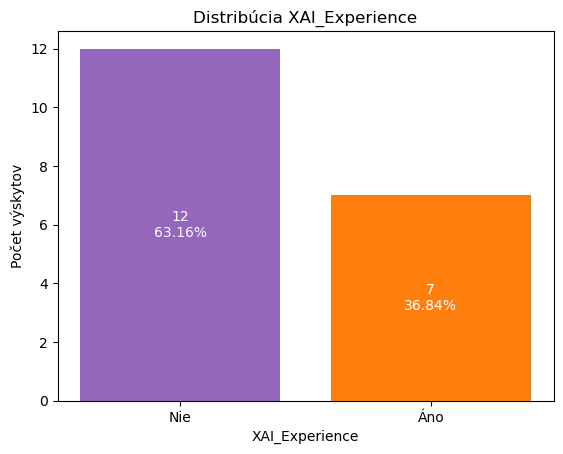

In [18]:
bar_plot(df_copy, 'XAI_Experience')

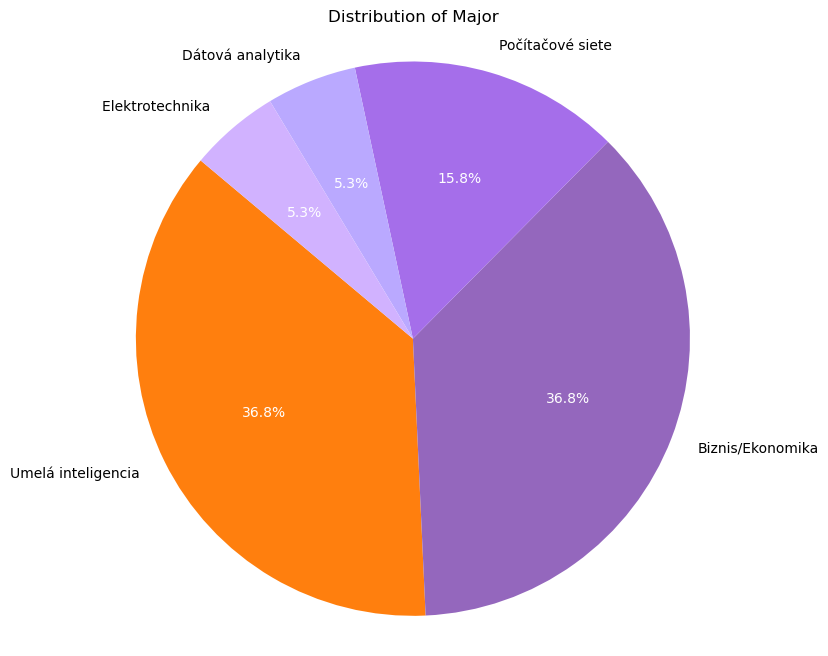

In [19]:
def pie_chart(df, column_name):
    counts = df[column_name].value_counts()

    plt.figure(figsize=(8, 8))
    colors = ['#ff7f0e', '#9467bd', '#a56eea', '#baa9ff', '#d1b2ff']
    #colors = ['#FFA500', '#FFA07A', '#EE82EE', '#9370db', '#8a2be2']   
    patches, texts, autotexts = plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    for autotext in autotexts:
        autotext.set_color('white')
    plt.title(f'Distribution of {column_name}')
    plt.axis('equal')  
    plt.show()

pie_chart(df_copy, 'Major')

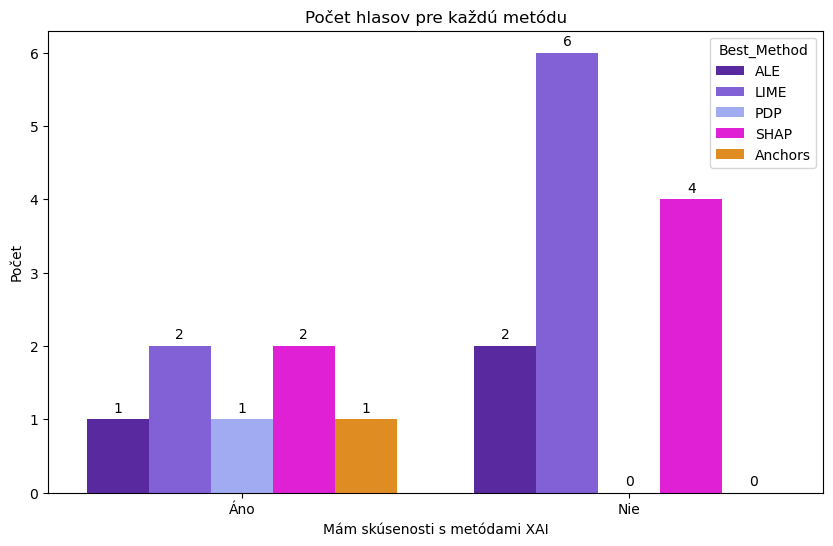

In [20]:
import seaborn as sns

my_palette = ["#5515B3", "#794DEB", "#93A1FE", "#FF00F1", "#FE9103"]
sns.set_palette(my_palette)

def count_plot(df, x_column, hue_column):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=x_column, hue=hue_column)
    plt.title(f'Počet hlasov pre každú metódu')
    plt.xlabel('Mám skúsenosti s metódami XAI')
    plt.ylabel('Počet')
    
        #Pridanie textu s počtom hlasov 
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.1, f'{int(height)}', ha='center', color='black')
    
    plt.legend(title=hue_column)
    plt.show()

count_plot(df_copy, 'XAI_Experience', 'Best_Method')


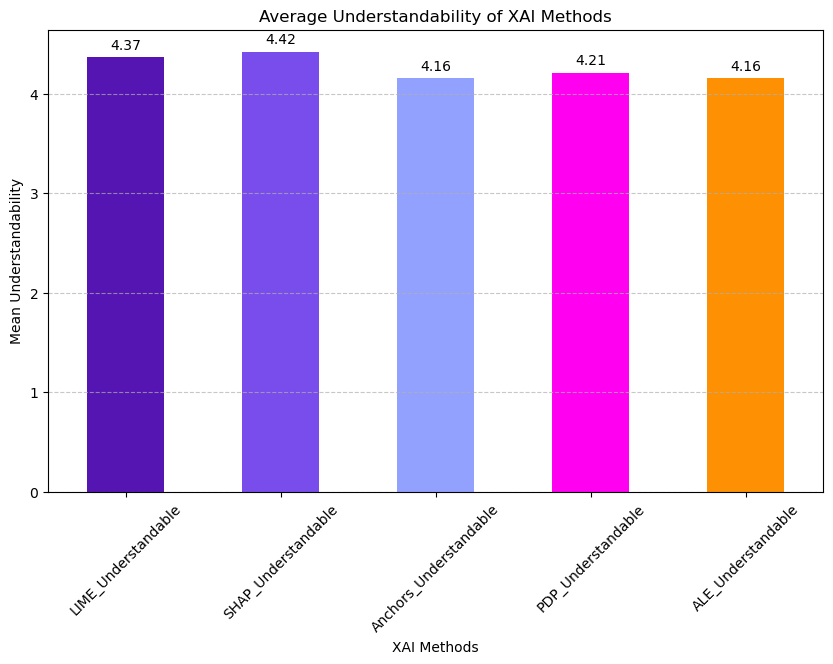

In [21]:
# Výpočet priemerných hodnôt
means = df_copy[['LIME_Understandable', 'SHAP_Understandable', 'Anchors_Understandable', 'PDP_Understandable', 'ALE_Understandable']].mean()

plt.figure(figsize=(10, 6))
means.plot(kind='bar', color=["#5515B3", "#794DEB", "#93A1FE", "#FF00F1", "#FE9103"])
plt.title('Average Understandability of XAI Methods')
plt.xlabel('XAI Methods')
plt.ylabel('Mean Understandability')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

 #Pridanie textu s priemernými hodnotami
for i, mean in enumerate(means):
    plt.text(i, mean + 0.05, f'{mean:.2f}', ha='center', va='bottom', color='black')

plt.show()


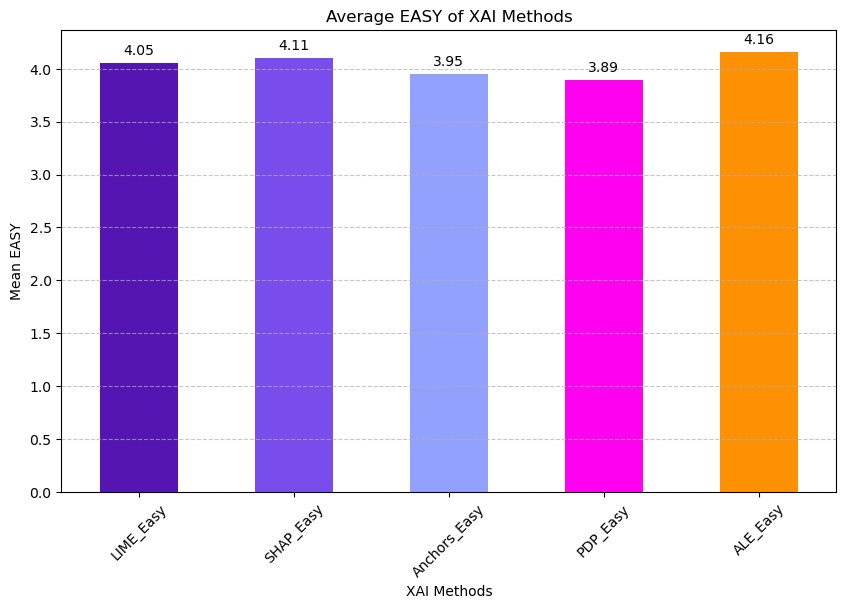

In [22]:
means = df_copy[['LIME_Easy', 'SHAP_Easy', 'Anchors_Easy', 'PDP_Easy', 'ALE_Easy']].mean()

plt.figure(figsize=(10, 6))
means.plot(kind='bar', color=["#5515B3", "#794DEB", "#93A1FE", "#FF00F1", "#FE9103"])
plt.title('Average EASY of XAI Methods')
plt.xlabel('XAI Methods')
plt.ylabel('Mean EASY')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, mean in enumerate(means):
    plt.text(i, mean + 0.05, f'{mean:.2f}', ha='center', va='bottom', color='black')

plt.show()


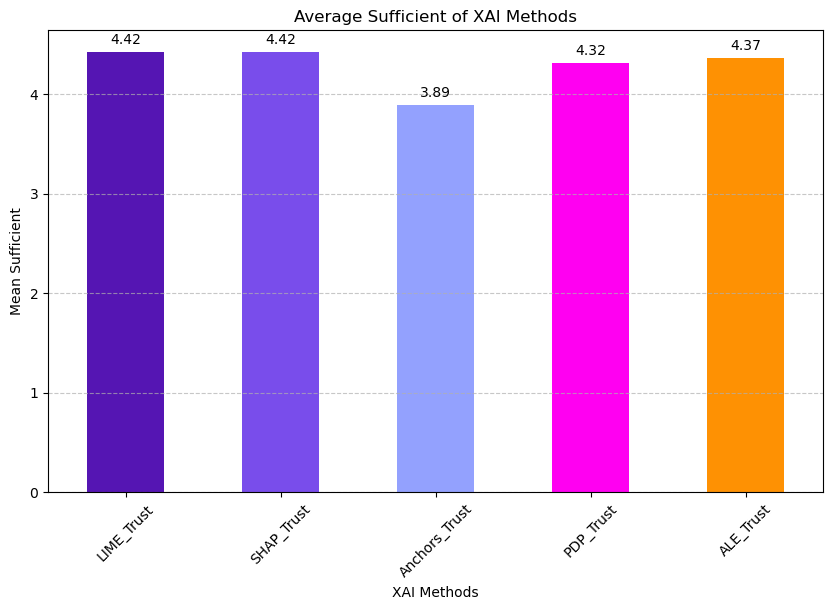

In [23]:
means = df_copy[['LIME_Trust', 'SHAP_Trust', 'Anchors_Trust', 'PDP_Trust', 'ALE_Trust']].mean()

plt.figure(figsize=(10, 6))
means.plot(kind='bar', color=["#5515B3", "#794DEB", "#93A1FE", "#FF00F1", "#FE9103"])
plt.title('Average Sufficient of XAI Methods')
plt.xlabel('XAI Methods')
plt.ylabel('Mean Sufficient')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, mean in enumerate(means):
    plt.text(i, mean + 0.05, f'{mean:.2f}', ha='center', va='bottom', color='black')

plt.show()


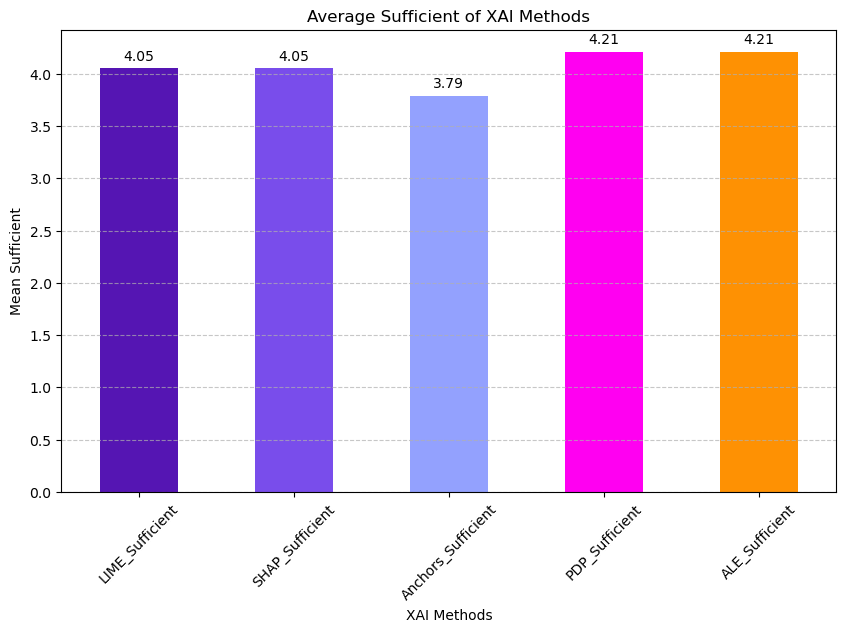

In [24]:
means = df_copy[['LIME_Sufficient', 'SHAP_Sufficient', 'Anchors_Sufficient', 'PDP_Sufficient', 'ALE_Sufficient']].mean()

plt.figure(figsize=(10, 6))
means.plot(kind='bar', color=["#5515B3", "#794DEB", "#93A1FE", "#FF00F1", "#FE9103"])
plt.title('Average Sufficient of XAI Methods')
plt.xlabel('XAI Methods')
plt.ylabel('Mean Sufficient')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, mean in enumerate(means):
    plt.text(i, mean + 0.05, f'{mean:.2f}', ha='center', va='bottom', color='black')

plt.show()


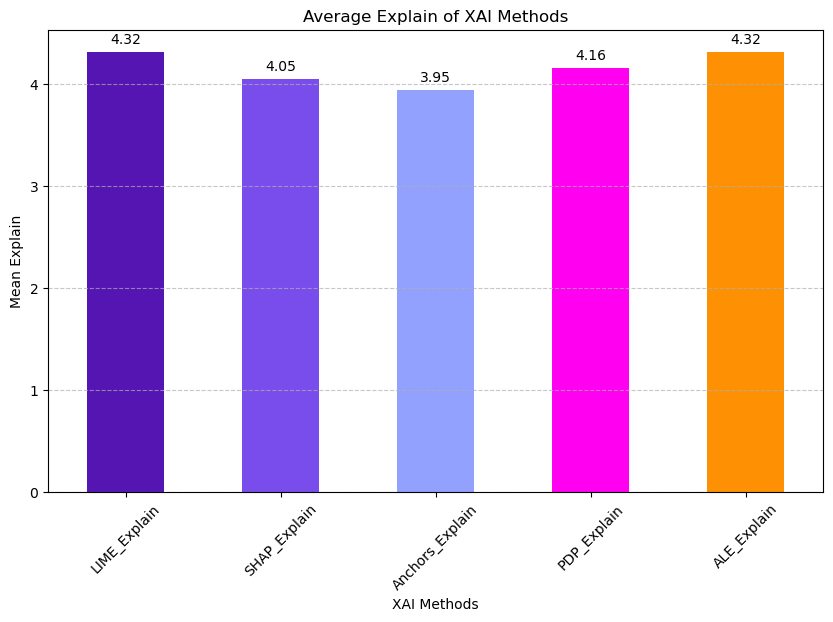

In [25]:
import matplotlib.pyplot as plt

means = df_copy[['LIME_Explain', 'SHAP_Explain', 'Anchors_Explain', 'PDP_Explain', 'ALE_Explain']].mean()

plt.figure(figsize=(10, 6))
means.plot(kind='bar', color=["#5515B3", "#794DEB", "#93A1FE", "#FF00F1", "#FE9103"])
plt.title('Average Explain of XAI Methods')
plt.xlabel('XAI Methods')
plt.ylabel('Mean Explain')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, mean in enumerate(means):
    plt.text(i, mean + 0.05, f'{mean:.2f}', ha='center', va='bottom', color='black')

plt.show()


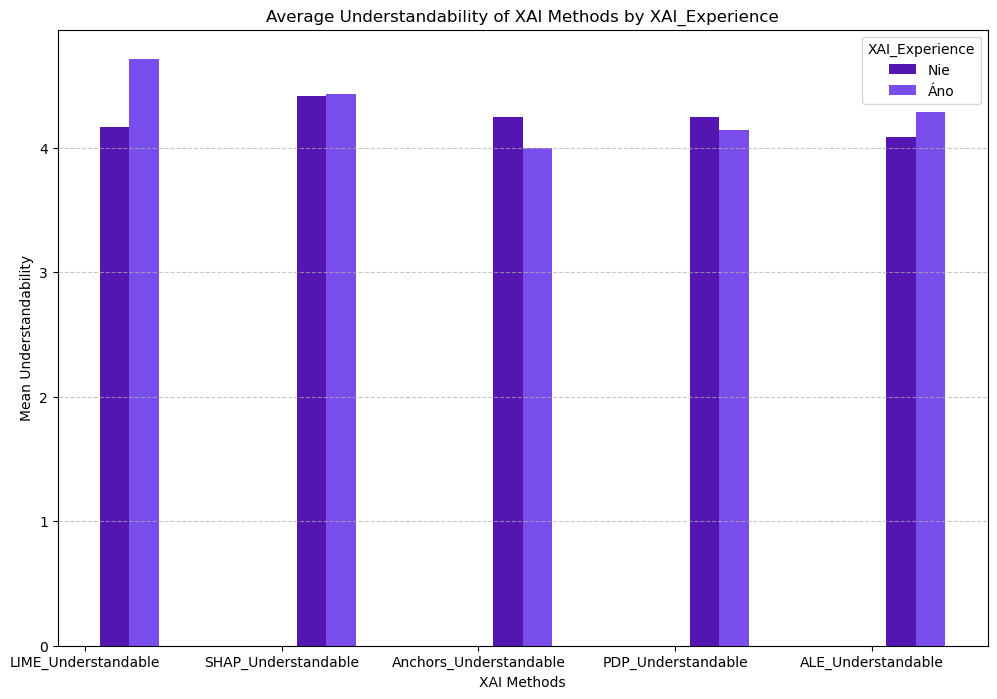

In [26]:
means_grouped = df_copy.groupby('XAI_Experience')[['LIME_Understandable', 'SHAP_Understandable', 'Anchors_Understandable', 'PDP_Understandable', 'ALE_Understandable']].mean()

plt.figure(figsize=(12, 8))

for i, (experience, means) in enumerate(means_grouped.iterrows(), start=1):
    plt.bar([x + i*0.15 for x in range(len(means))], means, width=0.15, label=experience)

plt.title('Average Understandability of XAI Methods by XAI_Experience')
plt.xlabel('XAI Methods')
plt.ylabel('Mean Understandability')
plt.xticks(range(len(means)), means.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='XAI_Experience')
plt.show()


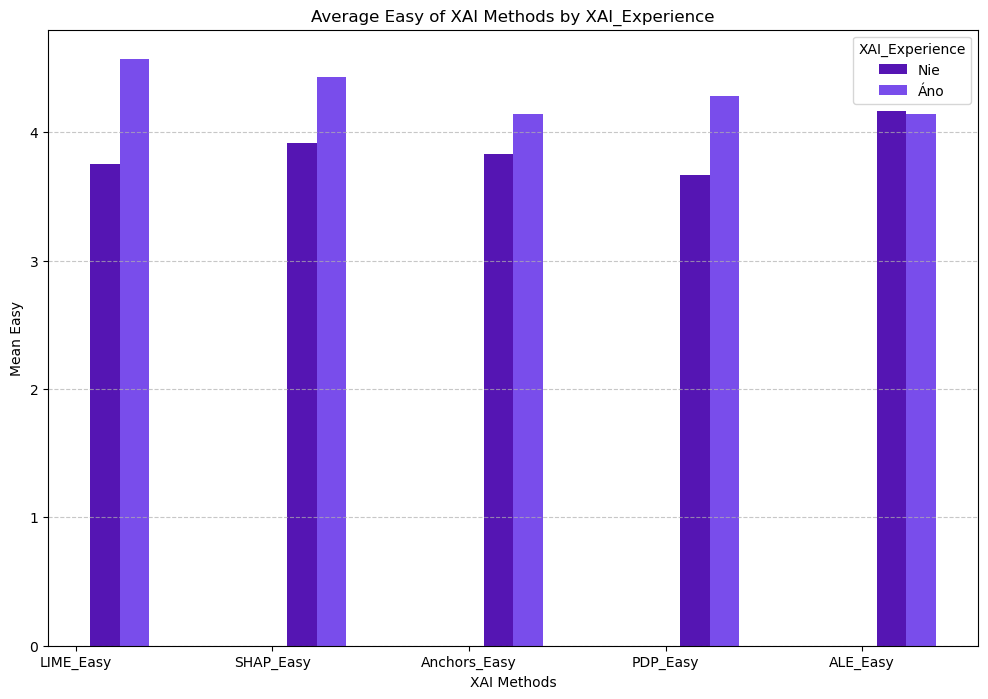

In [27]:
means_grouped = df_copy.groupby('XAI_Experience')[['LIME_Easy', 'SHAP_Easy', 'Anchors_Easy', 'PDP_Easy', 'ALE_Easy']].mean()
plt.figure(figsize=(12, 8))

for i, (experience, means) in enumerate(means_grouped.iterrows(), start=1):
    plt.bar([x + i*0.15 for x in range(len(means))], means, width=0.15, label=experience)

plt.title('Average Easy of XAI Methods by XAI_Experience')
plt.xlabel('XAI Methods')
plt.ylabel('Mean Easy')
plt.xticks(range(len(means)), means.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='XAI_Experience')
plt.show()

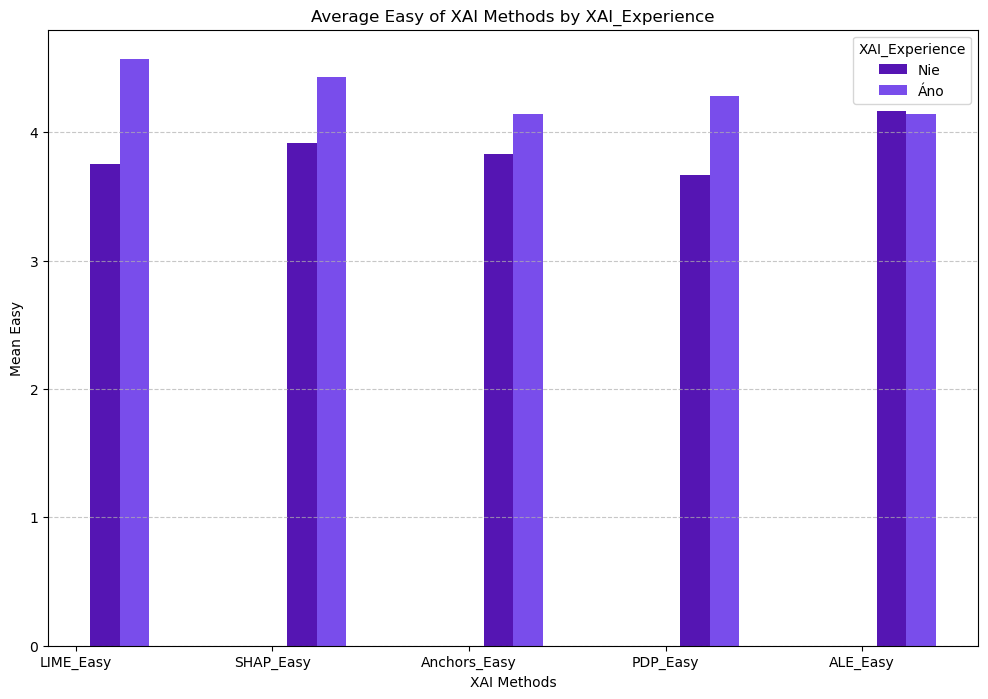

In [28]:
means_grouped = df_copy.groupby('XAI_Experience')[['LIME_Easy', 'SHAP_Easy', 'Anchors_Easy', 'PDP_Easy', 'ALE_Easy']].mean()
plt.figure(figsize=(12, 8))

for i, (experience, means) in enumerate(means_grouped.iterrows(), start=1):
    plt.bar([x + i*0.15 for x in range(len(means))], means, width=0.15, label=experience)

plt.title('Average Easy of XAI Methods by XAI_Experience')
plt.xlabel('XAI Methods')
plt.ylabel('Mean Easy')
plt.xticks(range(len(means)), means.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='XAI_Experience')
plt.show()

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;">
<h3>Krok 5 | Výpočet konečného hodnotenia pre každú metódu</h3>
</div>

In [29]:
#LIME
(4.37 + 4.05 + 4.42 + 4.05 + 4.32)

21.21

In [30]:
#SHAP
(4.42 + 4.11 + 4.42 + 4.05 + 4.05)

21.05

In [31]:
#Anchors
(4.16 + 3.95 + 3.89 + 3.79 + 3.95)

19.74

In [32]:
#PDP
(4.21 + 3.89 + 4.32 + 4.21 + 4.16)

20.79

In [33]:
#ALE
(4.16 + 4.16 + 4.37 + 4.21 + 4.32)

21.220000000000002

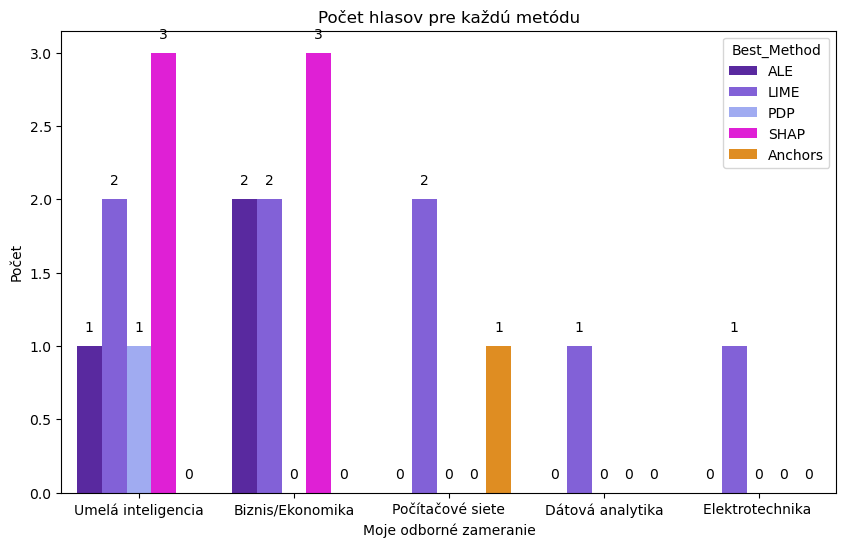

In [34]:
my_palette = ["#5515B3", "#794DEB", "#93A1FE", "#FF00F1", "#FE9103"]
sns.set_palette(my_palette)

def count_plot(df, x_column, hue_column):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=x_column, hue=hue_column)
    plt.title(f'Počet hlasov pre každú metódu')
    plt.xlabel('Moje odborné zameranie')
    plt.ylabel('Počet')
    
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.1, f'{int(height)}', ha='center', color='black')
    
    plt.legend(title=hue_column)
    plt.show()

count_plot(df_copy, 'Major', 'Best_Method')